In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./ds_salaries.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
data['experience_level'] = data['experience_level'] \
    .astype('category') \
    .cat \
    .set_categories(['EN', 'MI', 'SE', 'EX'], ordered=True)

In [4]:
salaries_usd=data['salary_in_usd'].copy()
salaries_usd

0        85847
1        30000
2        25500
3       175000
4       120000
         ...  
3750    412000
3751    151000
3752    105000
3753    100000
3754     94665
Name: salary_in_usd, Length: 3755, dtype: int64

In [5]:
data_to_process=data
data_to_process

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [6]:
data_of_interest=data_to_process.drop(columns=['salary','salary_currency']).copy()
data_of_interest

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


# work_year

<Axes: >

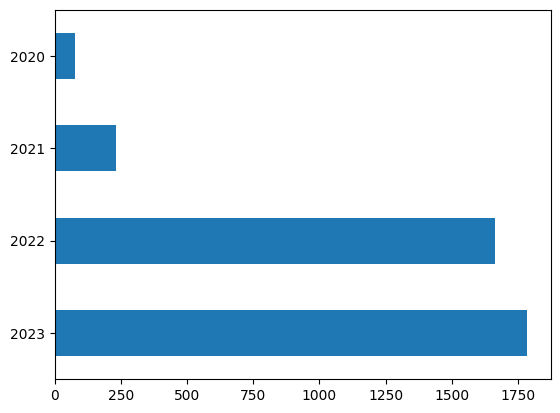

In [7]:
data_of_interest['work_year'].value_counts().plot.barh()

In [8]:
data_of_interest[data_of_interest["work_year"]==2020]["salary_in_usd"].median()

73065.0

In [9]:
data_of_interest[data_of_interest["work_year"]==2021]["salary_in_usd"].median()

80000.0

In [10]:
data_of_interest[data_of_interest["work_year"]==2022]["salary_in_usd"].median()

131300.0

In [11]:
data_of_interest[data_of_interest["work_year"]==2023]["salary_in_usd"].median()

143860.0

In [12]:
mediana_salarial=[]

for i in [2020,2021,2022, 2023]:
    mediana_salarial.append(data_of_interest[data_of_interest["work_year"]==i]["salary_in_usd"].median())
mediana_salarial

[73065.0, 80000.0, 131300.0, 143860.0]

In [13]:
anos=['2020','2021','2022', '2023']
anos

['2020', '2021', '2022', '2023']

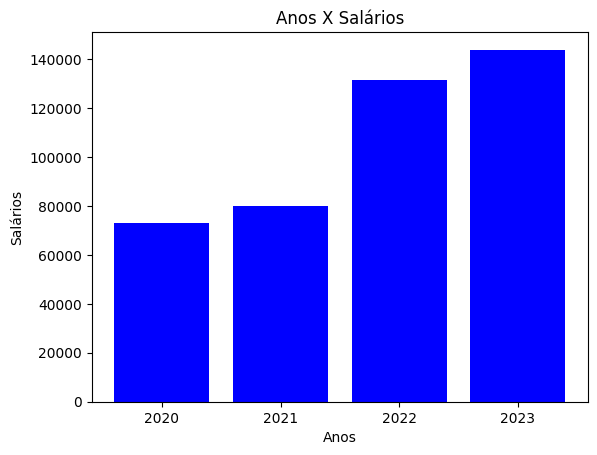

In [14]:
plt.bar(anos,mediana_salarial, color='blue')
plt.title('Anos X Salários')
plt.xlabel('Anos')
plt.ylabel('Salários')
plt.show()

In [15]:
porcentagem_aumento_2020_2021=(mediana_salarial[1]-mediana_salarial[0])/mediana_salarial[0]
porcentagem_aumento_2020_2021

0.09491548621090809

# experience_level

<Axes: >

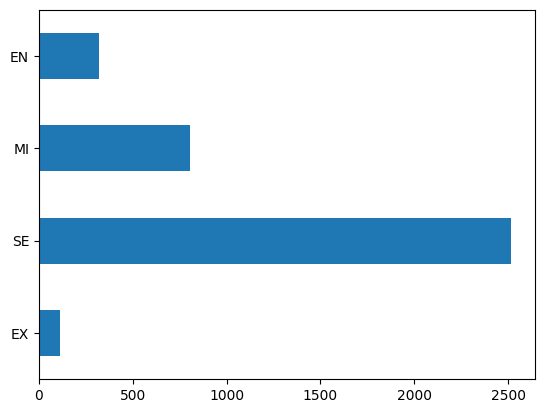

In [16]:
data_of_interest['experience_level'].value_counts().sort_index(ascending=False).plot(kind='barh')

In [17]:
mediana_salarial_experiencia=[]
experiencia=["EN","MI","SE","EX"]

for i in experiencia:
    mediana_salarial_experiencia.append(data_of_interest[data_of_interest["experience_level"]==i]["salary_in_usd"].median())
mediana_salarial_experiencia

[70000.0, 100000.0, 146000.0, 196000.0]

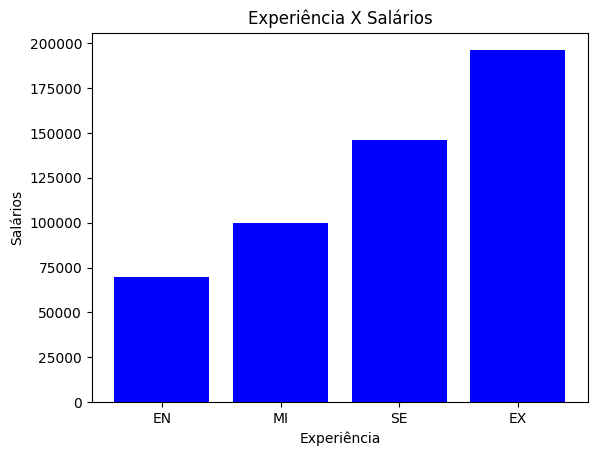

In [18]:
plt.bar(experiencia,mediana_salarial_experiencia, color='blue')
plt.title('Experiência X Salários')
plt.xlabel('Experiência')
plt.ylabel('Salários')
plt.show()

# Employment Type

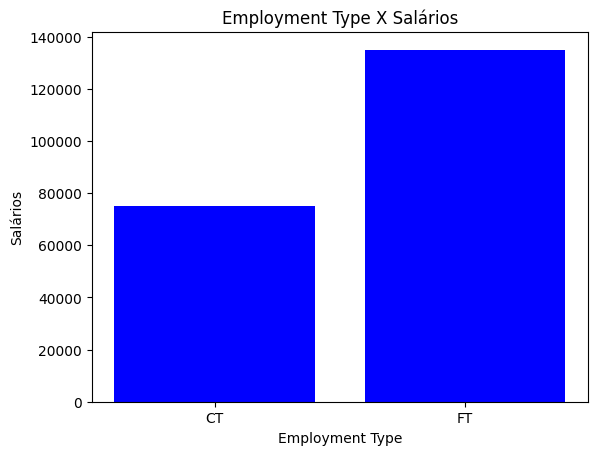

In [19]:
mediana_salarial_ET=[]
employment_type=["CT", "FT"]

for i in employment_type:
    mediana_salarial_ET.append(data_of_interest[data_of_interest["employment_type"]==i]["salary_in_usd"].median())
plt.bar(employment_type,mediana_salarial_ET, color='blue')
plt.title('Employment Type X Salários')
plt.xlabel('Employment Type')
plt.ylabel('Salários')
plt.show()

# job_title

In [20]:
data_of_interest['job_title'].describe()

count              3755
unique               93
top       Data Engineer
freq               1040
Name: job_title, dtype: object

# company_location

<Axes: >

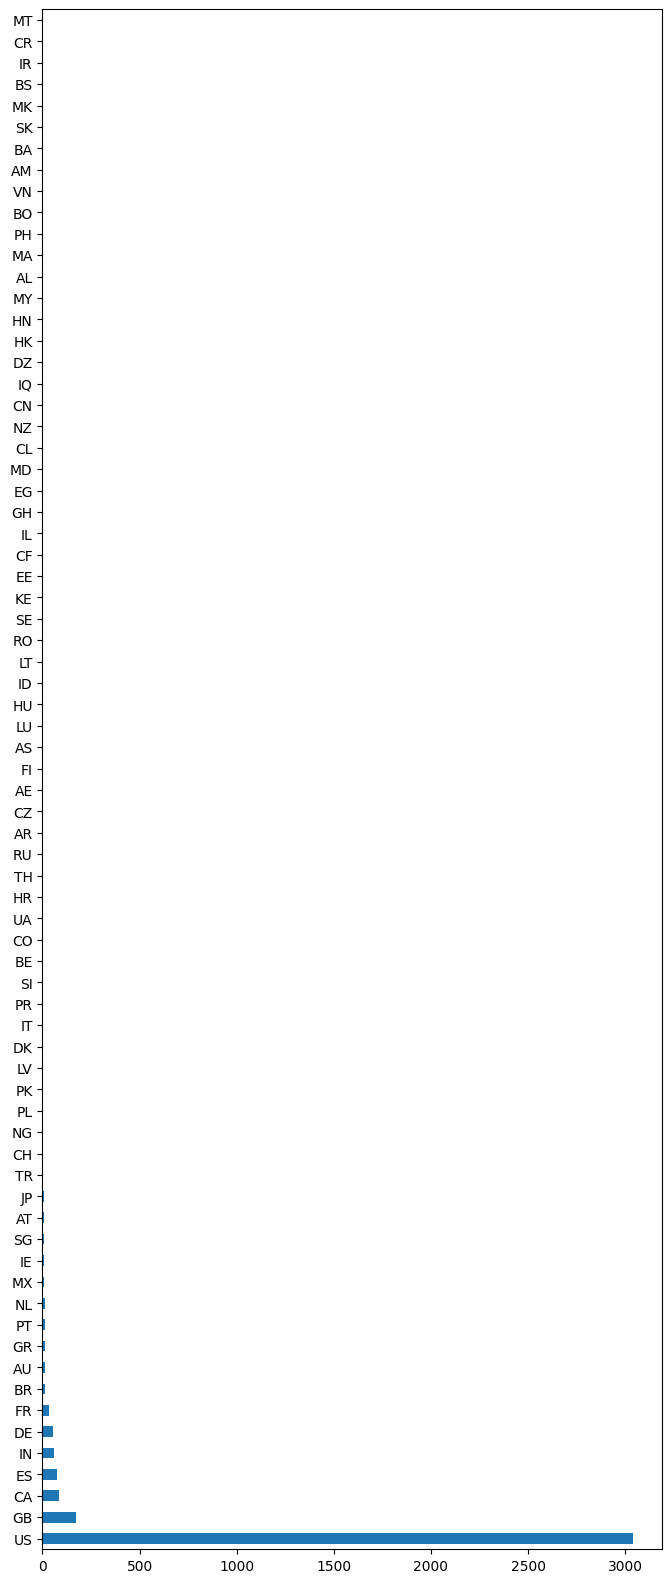

In [21]:
plt.figure(figsize=(8, 20))
data_of_interest['company_location'].value_counts().plot.barh()


In [22]:


data_of_interest['company_location'].value_counts().US/data_of_interest['company_location'].value_counts().sum()*100

80.95872170439414

In [23]:
data_of_interest = data_of_interest[data_of_interest['company_location'] == "US"]
data_of_interest['company_location']

1       US
2       US
5       US
6       US
9       US
        ..
3749    US
3750    US
3751    US
3752    US
3753    US
Name: company_location, Length: 3040, dtype: object

<Axes: >

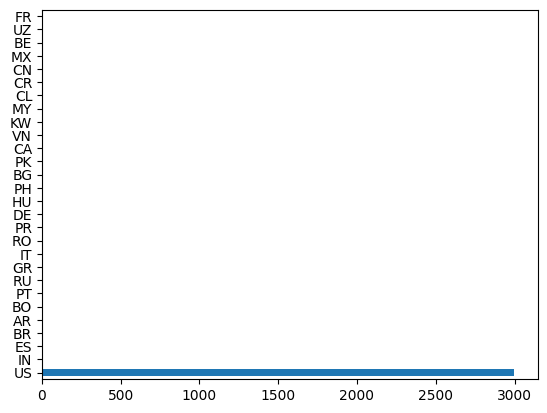

In [24]:
data_of_interest['employee_residence'].value_counts().plot.barh()

In [25]:
data_of_interest['employee_residence'].value_counts().US/data_of_interest['employee_residence'].value_counts().sum()*100

98.65131578947368

<Axes: >

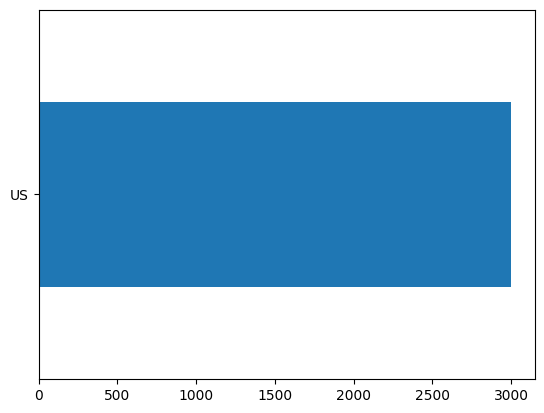

In [26]:
data_of_interest = data_of_interest[data_of_interest['employee_residence'] == "US"]
data_of_interest['employee_residence'].value_counts().plot.barh()

In [27]:
data_of_interest = data_of_interest.drop(columns=['employee_residence', 'company_location'])

# remote_ratio

<Axes: >

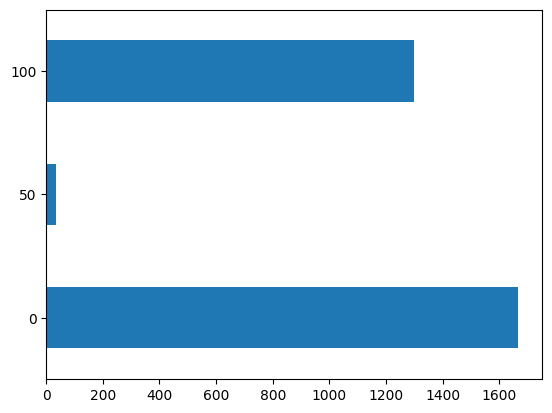

In [28]:
data_of_interest['remote_ratio'].value_counts().sort_index().plot.barh()

In [29]:
data_of_interest['remote_ratio'].value_counts()

0      1667
100    1298
50       34
Name: remote_ratio, dtype: int64

<Axes: >

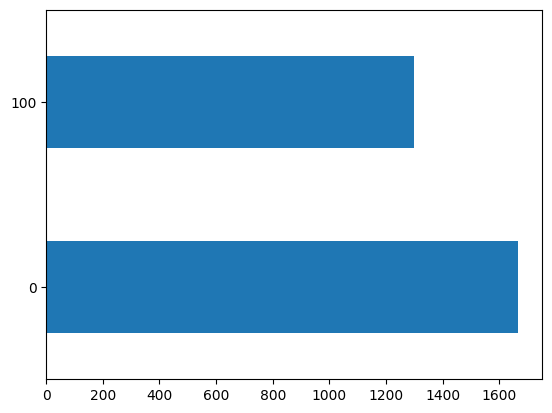

In [30]:
data_of_interest = data_of_interest[data_of_interest['remote_ratio'] != 50]
data_of_interest['remote_ratio'].value_counts().sort_index().plot.barh()

In [31]:
data_of_interest['remote_ratio'] = (data_of_interest['remote_ratio'] == 100)

# company_size

<Axes: >

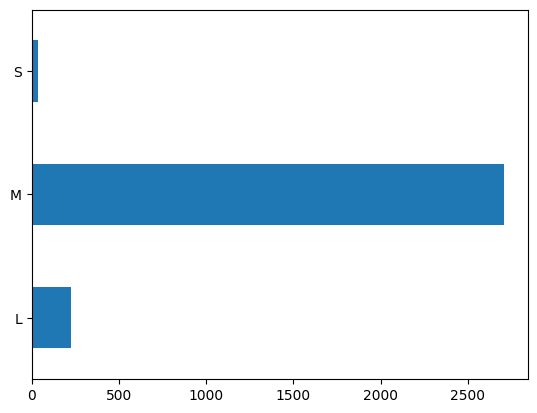

In [32]:
data_of_interest['company_size'].value_counts().sort_index().plot.barh()

In [33]:
data_of_interest['company_size'].value_counts().S/data_of_interest['company_size'].value_counts().sum()*100

1.1467116357504217

<Axes: >

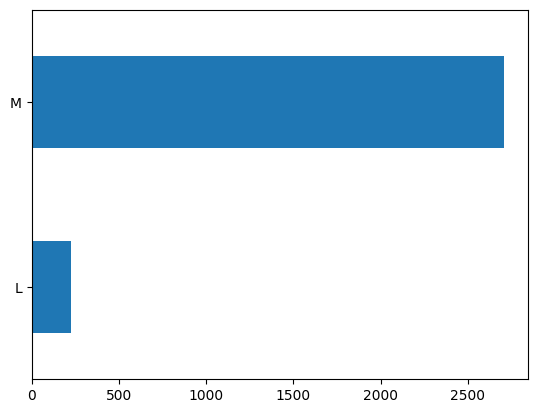

In [34]:
data_of_interest = data_of_interest[data_of_interest['company_size'] != "S"]
data_of_interest['company_size'].value_counts().sort_index().plot.barh()

# salary

<Axes: ylabel='Frequency'>

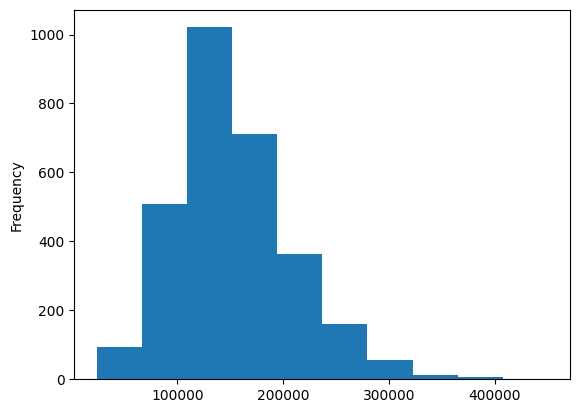

In [35]:
data_of_interest['salary_in_usd'].plot.hist()

In [36]:
data_of_interest['log_salary'] = np.log10(data_of_interest['salary_in_usd'])

<Axes: ylabel='Frequency'>

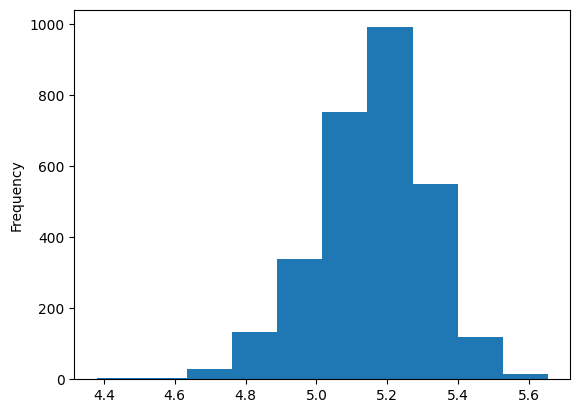

In [37]:
data_of_interest['log_salary'].plot.hist()

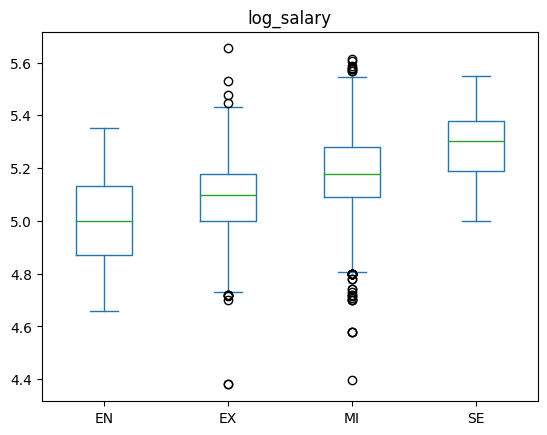

In [38]:
data_of_interest[['log_salary', 'experience_level']].plot.box(by='experience_level');

In [39]:
data['job_title'].nunique()


93

In [40]:
data['job_title'].unique()


data.loc[data['job_title'].str.contains('Data Scientist', case=False), 'job_title'] = 'Data Scientist'


data.loc[data['job_title'].str.contains('Data Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Data Analytics', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Data Architect', case=False), 'job_title'] = 'Data Architect'

data.loc[data['job_title'].str.contains('Data Science', case=False), 'job_title'] = 'Data Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'

data.loc[data['job_title'].str.contains('Computer Vision', case=False), 'job_title'] = 'Machine Learning Engineer'

data.loc[data['job_title'].str.contains('ML Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'

data.loc[data['job_title'].str.contains('AI Scientist', case=False), 'job_title'] = 'AI Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Developer', case=False), 'job_title'] = 'AI Developer'


data.loc[data['job_title'].str.contains('Power BI Developer', case=False), 'job_title'] = 'BI Developer'


data.loc[data['job_title'].str.contains('Machine Learning Software Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Machine Learning Research Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Deep Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Deep Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Data Operations Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data DevOps Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Quality Analyst', case=False), 'job_title'] = 'Data Analyst'

data.loc[data['job_title'].str.contains('BI Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Insight Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Data Operations Analyst', case=False), 'job_title'] = 'Data Analyst'


data.loc[data['job_title'].str.contains('Applied Machine Learning Scientist', case=False), 'job_title'] = 'Machine Learning Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Researcher', case=False), 'job_title'] = 'Machine Learning Scientist'


data.loc[data['job_title'].str.contains('Machine Learning Infrastructure Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Data Modeler', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Architect', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Data Infrastructure Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Cloud Database Engineer', case=False), 'job_title'] = 'Data Engineer'


data.loc[data['job_title'].str.contains('Applied Scientist', case=False), 'job_title'] = 'Data Scientist'

data.loc[data['job_title'].str.contains('BI', case=False), 'job_title'] = 'Business Intelligence'


data.loc[data['job_title'].str.contains('Business Intelligence', case=False), 'job_title'] = 'Business Intelligence'


data.loc[data['job_title'].str.contains('Deep Learning Researcher', case=False), 'job_title'] = 'Machine Learning Scientist'


data.loc[data['job_title'].str.contains('AI Programmer', case=False), 'job_title'] = 'AI Developer'


data.loc[data['job_title'].str.contains('NLP Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


data.loc[data['job_title'].str.contains('Data Management Specialist', case=False), 'job_title'] = 'Data Specialist'

data.loc[data['job_title'].str.contains('Data Manager', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Head of Data', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Data Lead', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Manager Data Management', case=False), 'job_title'] = 'Manager Data'

data.loc[data['job_title'].str.contains('Machine Learning Manager', case=False), 'job_title'] = 'Manager Machine Learning'

data.loc[data['job_title'].str.contains('Head of Machine Learning', case=False), 'job_title'] = 'Manager Machine Learning'
data.loc[data['job_title'].str.contains('AI Scientist', case=False), 'job_title'] = 'Machine Learning Scientist'
data = data.drop(data_to_process[data_to_process.job_title == "Autonomous Vehicle Technician"].index)


In [41]:
data['job_title'].nunique()


17

In [42]:
data["job_title"].value_counts()

Data Engineer                 1196
Data Scientist                1045
Data Analyst                   718
Machine Learning Engineer      394
Analytics Engineer             103
Research Scientist              82
Machine Learning Scientist      61
Manager Data                    42
Research Engineer               37
AI Developer                    20
Business Intelligence           18
Data Specialist                 15
ETL Developer                   10
MLOps Engineer                   4
Manager Machine Learning         4
ETL Engineer                     2
Data Strategist                  2
Name: job_title, dtype: int64

Decisão: eliminar job_titles de AI Developer para baixo

In [43]:
count = data_of_interest['job_title'].value_counts()

filtered = count[count > 20]
filtered.nunique()

13

<Axes: >

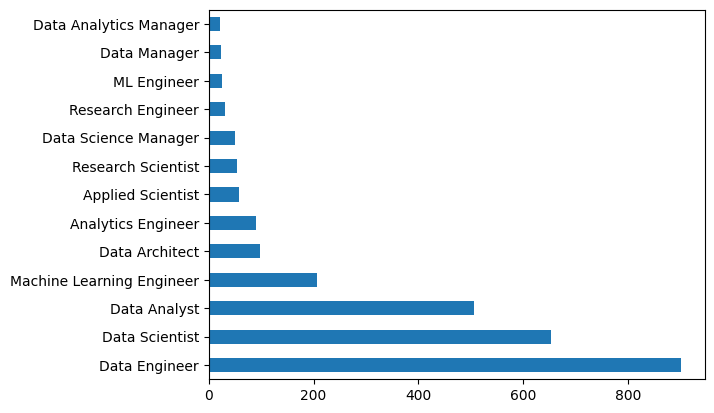

In [44]:
data_of_interest = data_of_interest.loc[data_of_interest['job_title'].isin(filtered.index), :]
data_of_interest['job_title'].value_counts().plot.barh()

# salary

In [45]:
data_of_interest

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,log_salary
5,2023,SE,FT,Applied Scientist,222200,False,L,5.346744
6,2023,SE,FT,Applied Scientist,136000,False,L,5.133539
9,2023,SE,FT,Data Scientist,147100,False,M,5.167613
10,2023,SE,FT,Data Scientist,90700,False,M,4.957607
11,2023,SE,FT,Data Analyst,130000,True,M,5.113943
...,...,...,...,...,...,...,...,...
3738,2021,MI,FT,Data Scientist,73000,False,L,4.863323
3740,2020,SE,FT,Data Science Manager,190200,True,M,5.279211
3741,2020,MI,FT,Data Scientist,118000,True,M,5.071882
3742,2020,MI,FT,Data Scientist,138350,True,M,5.140979


In [46]:
#data_of_interest = data_of_interest.drop(columns=['work_year', 'remote_ratio'])

In [47]:
data_of_interest = data_of_interest[data_of_interest['employment_type'] == "FT"]
data_of_interest = data_of_interest.drop(columns=["employment_type"])

In [48]:
for c in data_of_interest.columns:
    print(c)

work_year
experience_level
job_title
salary_in_usd
remote_ratio
company_size
log_salary


In [49]:
data_of_interest = pd.get_dummies(data_of_interest, drop_first=False)


In [50]:
# data_of_interest.columns

In [51]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder

# one_hot_enc = make_column_transformer(
#     (OneHotEncoder(handle_unknown = 'ignore'),
#     ["experience_level", "job_title", "company_size"]),
#     remainder='passthrough')

# dados = one_hot_enc.fit_transform(data_of_interest)
# dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())
# data_of_interest=dados

In [52]:
for c in data_of_interest.columns:
    print(c)

work_year
salary_in_usd
remote_ratio
log_salary
experience_level_EN
experience_level_MI
experience_level_SE
experience_level_EX
job_title_Analytics Engineer
job_title_Applied Scientist
job_title_Data Analyst
job_title_Data Analytics Manager
job_title_Data Architect
job_title_Data Engineer
job_title_Data Manager
job_title_Data Science Manager
job_title_Data Scientist
job_title_ML Engineer
job_title_Machine Learning Engineer
job_title_Research Engineer
job_title_Research Scientist
company_size_L
company_size_M


# modelo

In [53]:
y = data_of_interest['log_salary'].copy()
X = data_of_interest.drop(columns=['salary_in_usd', 'log_salary']).copy()
X = X.astype('float')

In [54]:
# y = data_of_interest['remainder__log_salary'].copy()
# X = data_of_interest.drop(columns=['remainder__salary_in_usd', 'remainder__log_salary']).copy()
# X = X.astype('float')

In [55]:
X.shape, y.shape

((2715, 21), (2715,))

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [57]:
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, test_size=0.33)

# modelo 1: Ridge

In [58]:
import math
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

model = Ridge(alpha=0.6)
model.fit(X_train_valid, y_train_valid)

y_pred = model.predict(X_test_valid)
RMSE = math.sqrt(mean_squared_error(y_test_valid, y_pred))
RMSE

0.14423991457166385

In [59]:
y_pred_test = model.predict(X_test)
RMSE_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
RMSE_test

0.13241535583890815

In [60]:
list(zip(X_test_valid.columns, (((10**model.coef_)-1)*100)))

[('work_year', 2.6402796618116176),
 ('remote_ratio', 0.10046125009262052),
 ('experience_level_EN', -26.04917527563948),
 ('experience_level_MI', -7.965233152124462),
 ('experience_level_SE', 7.4944758828626945),
 ('experience_level_EX', 36.68438884572465),
 ('job_title_Analytics Engineer', -7.462144237794533),
 ('job_title_Applied Scientist', 16.633089645086763),
 ('job_title_Data Analyst', -23.62192973388877),
 ('job_title_Data Analytics Manager', -9.458015222317051),
 ('job_title_Data Architect', -1.9610521166645523),
 ('job_title_Data Engineer', -9.301975466262146),
 ('job_title_Data Manager', -25.168408062305225),
 ('job_title_Data Science Manager', 25.03430166899614),
 ('job_title_Data Scientist', -3.4770511851605623),
 ('job_title_ML Engineer', 19.765536620265745),
 ('job_title_Machine Learning Engineer', 9.572330587978705),
 ('job_title_Research Engineer', 13.147756417186773),
 ('job_title_Research Scientist', 12.36218517297294),
 ('company_size_L', 1.1365282306686986),
 ('com

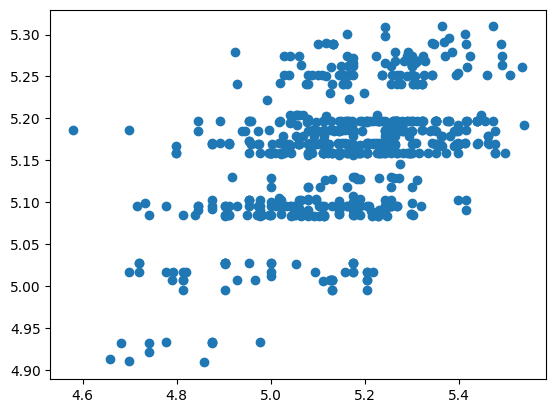

In [61]:
plt.scatter(y_test_valid, y_pred)

Text(0, 0.5, 'Erro [$]')

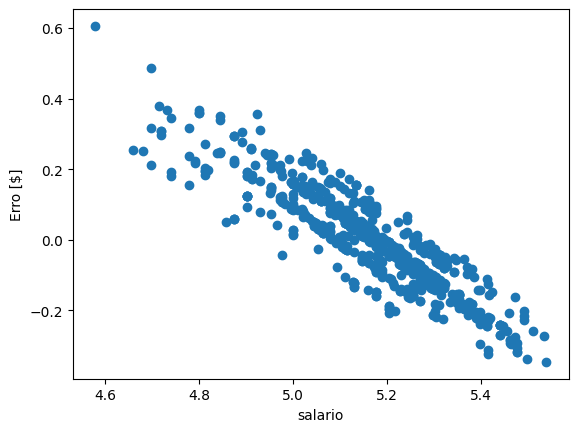

In [62]:
erro = y_pred - y_test_valid

plt.scatter(y_test_valid, erro)
plt.xlabel('salario')
plt.ylabel('Erro [$]')

In [63]:
erro_percentual = (10**erro) - 1

Text(0, 0.5, 'Erro [%]')

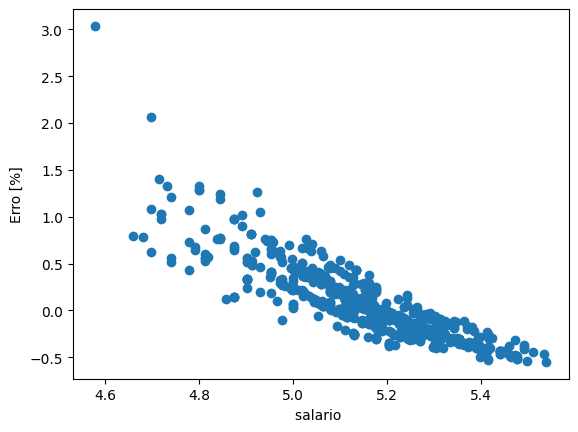

In [64]:
plt.scatter(y_test_valid, erro_percentual)
plt.xlabel('salario ')
plt.ylabel('Erro [%]')

In [65]:
model.coef_

array([ 0.01131783,  0.00043608, -0.13105698, -0.03604808,  0.03138615,
        0.13571892, -0.03368057,  0.06682178, -0.11703132, -0.04314999,
       -0.00860136, -0.04240217, -0.12591502,  0.09702917, -0.01536942,
        0.07833186,  0.0397009 ,  0.05364595,  0.05062018,  0.00490804,
       -0.00490804])

In [66]:
pd.Series(model.coef_, index = X_test.columns)


work_year                              0.011318
remote_ratio                           0.000436
experience_level_EN                   -0.131057
experience_level_MI                   -0.036048
experience_level_SE                    0.031386
experience_level_EX                    0.135719
job_title_Analytics Engineer          -0.033681
job_title_Applied Scientist            0.066822
job_title_Data Analyst                -0.117031
job_title_Data Analytics Manager      -0.043150
job_title_Data Architect              -0.008601
job_title_Data Engineer               -0.042402
job_title_Data Manager                -0.125915
job_title_Data Science Manager         0.097029
job_title_Data Scientist              -0.015369
job_title_ML Engineer                  0.078332
job_title_Machine Learning Engineer    0.039701
job_title_Research Engineer            0.053646
job_title_Research Scientist           0.050620
company_size_L                         0.004908
company_size_M                        -0

# modelo polinomial de grau 2

In [67]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_valid_transf = transformer.fit_transform(X_train_valid)

In [68]:
feat_names = transformer.get_feature_names_out()

In [69]:
X_train_valid_transf.shape

(1364, 252)

In [70]:
from sklearn.linear_model import Ridge
alpha = 1e-3
model = Ridge(alpha=alpha)

model.fit(X_train_valid_transf, y_train_valid)

Ridge(alpha=0.001)

In [71]:
list(zip(feat_names, ((10**model.coef_) - 1)*100))

[('work_year', -97.53061091453094),
 ('remote_ratio', 413.9251143380135),
 ('experience_level_EN', 245.77521001746513),
 ('experience_level_MI', 377.60532010097296),
 ('experience_level_SE', -94.7379115208009),
 ('experience_level_EX', 15.074281478531692),
 ('job_title_Analytics Engineer', -12.219274634350075),
 ('job_title_Applied Scientist', -1.3285397160310963),
 ('job_title_Data Analyst', 14.538110229927526),
 ('job_title_Data Analytics Manager', -4.70078467491386),
 ('job_title_Data Architect', 25.011798294915664),
 ('job_title_Data Engineer', -63.34760551337932),
 ('job_title_Data Manager', -7.127330381791652),
 ('job_title_Data Science Manager', 19.15006223314697),
 ('job_title_Data Scientist', -82.69433772601164),
 ('job_title_ML Engineer', 5.051830713962802),
 ('job_title_Machine Learning Engineer', 6.395548252524685),
 ('job_title_Research Engineer', 49.108214762882675),
 ('job_title_Research Scientist', 623.2974907151212),
 ('company_size_L', 147.05710080704378),
 ('company_

In [72]:
X_test_valid_transf = transformer.transform(X_test_valid)
y_pred = model.predict(X_test_valid_transf)

In [73]:
RMSE = math.sqrt(mean_squared_error(y_test_valid, y_pred))
RMSE

0.14674612855132704

In [74]:
aux = y_pred - y_test_valid
aux[aux > 1e6]

Series([], Name: log_salary, dtype: float64)

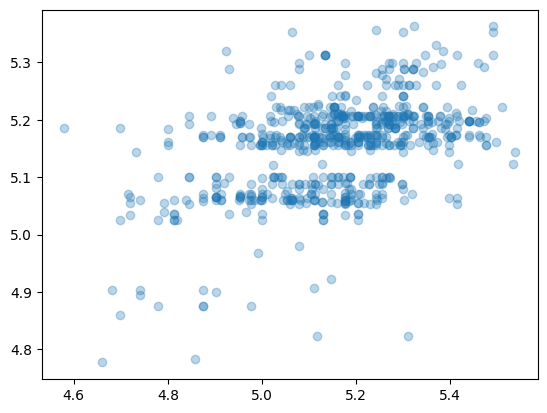

In [75]:
plt.scatter(y_test_valid, y_pred, alpha=0.3)

Text(0, 0.5, 'Erro [$]')

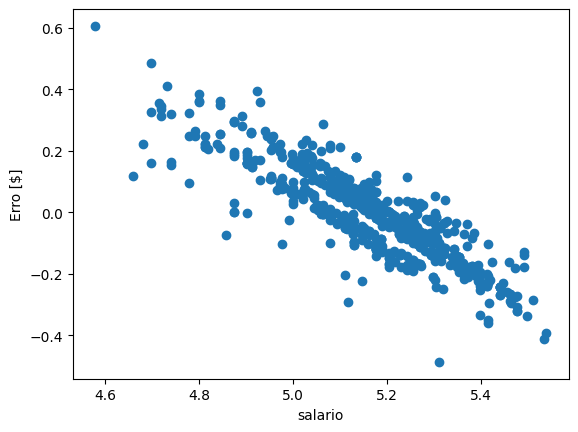

In [76]:
erro = y_pred - y_test_valid

plt.scatter(y_test_valid, erro)
plt.xlabel('salario')
plt.ylabel('Erro [$]')

In [77]:
erro_percentual = (10**erro) - 1

Text(0, 0.5, 'Erro [%]')

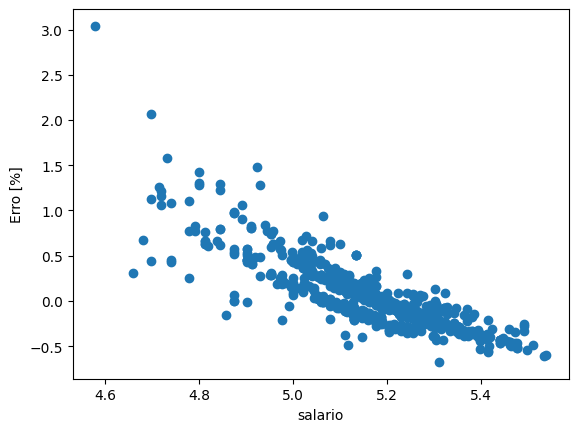

In [78]:
plt.scatter(y_test_valid, erro_percentual)
plt.xlabel('salario')
plt.ylabel('Erro [%]')

In [79]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_valid, y_train_valid)
y_pred = model.predict(X_test_valid)
RMSE = math.sqrt(mean_squared_error(y_test_valid, y_pred))
RMSE

0.1492039231744126

# Regressão Linear

In [80]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_LR = LinearRegression()
model_LR.fit(X_train_valid, y_train_valid)

y_pred_LR = model_LR.predict(X_test_valid)
RMSE_LR = math.sqrt(mean_squared_error(y_test_valid, y_pred_LR))
RMSE_LR

0.14421270719348545

In [81]:
y_pred_test_LR = model_LR.predict(X_test)
RMSE_test_LR = math.sqrt(mean_squared_error(y_test, y_pred_test_LR))
RMSE_test_LR

0.1324669273022006

In [82]:
model_LR.coef_

array([ 1.07077393e-02, -1.47436285e-03,  2.79112772e+12,  2.79112772e+12,
        2.79112772e+12,  2.79112772e+12,  3.69967304e+10,  3.69967304e+10,
        3.69967304e+10,  3.69967304e+10,  3.69967304e+10,  3.69967304e+10,
        3.69967304e+10,  3.69967304e+10,  3.69967304e+10,  3.69967304e+10,
        3.69967304e+10,  3.69967304e+10,  3.69967304e+10, -9.67023067e+12,
       -9.67023067e+12])

In [83]:
list(zip(X_test_valid.columns, (((10**model_LR.coef_)-1)*100)))

/var/folders/km/6zn46pss2gxdwbr816s30drh0000gn/T/ipykernel_1313/291640800.py:1: RuntimeWarning: overflow encountered in power
  list(zip(X_test_valid.columns, (((10**model_LR.coef_)-1)*100)))


[('work_year', 2.4961940745951816),
 ('remote_ratio', -0.33890899545165887),
 ('experience_level_EN', inf),
 ('experience_level_MI', inf),
 ('experience_level_SE', inf),
 ('experience_level_EX', inf),
 ('job_title_Analytics Engineer', inf),
 ('job_title_Applied Scientist', inf),
 ('job_title_Data Analyst', inf),
 ('job_title_Data Analytics Manager', inf),
 ('job_title_Data Architect', inf),
 ('job_title_Data Engineer', inf),
 ('job_title_Data Manager', inf),
 ('job_title_Data Science Manager', inf),
 ('job_title_Data Scientist', inf),
 ('job_title_ML Engineer', inf),
 ('job_title_Machine Learning Engineer', inf),
 ('job_title_Research Engineer', inf),
 ('job_title_Research Scientist', inf),
 ('company_size_L', -100.0),
 ('company_size_M', -100.0)]

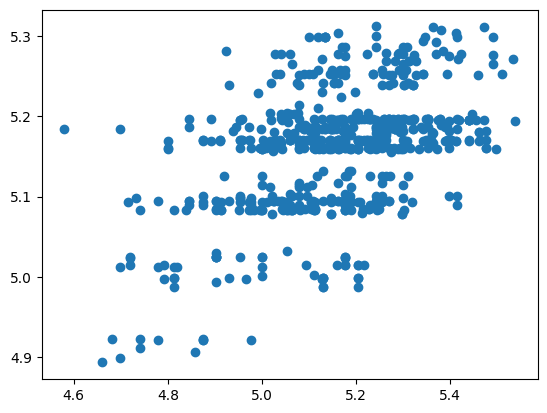

In [84]:
plt.scatter(y_test_valid, y_pred_LR)

Text(0, 0.5, 'Erro [$]')

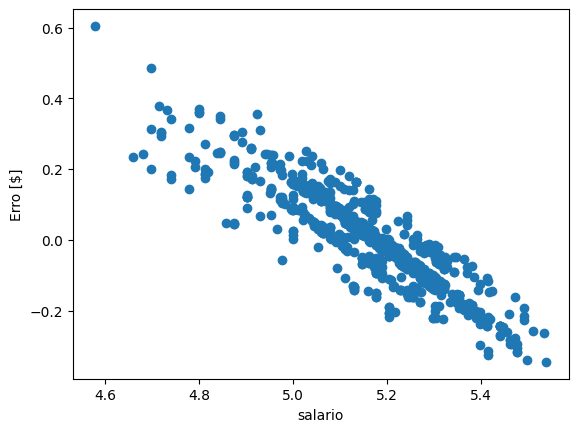

In [85]:
erro_LR = y_pred_LR - y_test_valid

plt.scatter(y_test_valid, erro_LR)
plt.xlabel('salario')
plt.ylabel('Erro [$]')

In [86]:
erro_percentual_LR = (10**erro_LR) - 1

Text(0, 0.5, 'Erro [%]')

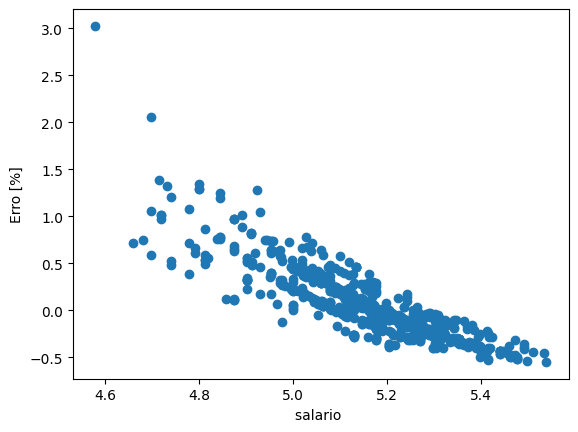

In [87]:
plt.scatter(y_test_valid, erro_percentual_LR)
plt.xlabel('salario ')
plt.ylabel('Erro [%]')

In [88]:
list(zip(X_train_valid.columns, ((10**model_LR.coef_) - 1)*100))

/var/folders/km/6zn46pss2gxdwbr816s30drh0000gn/T/ipykernel_1313/266186117.py:1: RuntimeWarning: overflow encountered in power
  list(zip(X_train_valid.columns, ((10**model_LR.coef_) - 1)*100))


[('work_year', 2.4961940745951816),
 ('remote_ratio', -0.33890899545165887),
 ('experience_level_EN', inf),
 ('experience_level_MI', inf),
 ('experience_level_SE', inf),
 ('experience_level_EX', inf),
 ('job_title_Analytics Engineer', inf),
 ('job_title_Applied Scientist', inf),
 ('job_title_Data Analyst', inf),
 ('job_title_Data Analytics Manager', inf),
 ('job_title_Data Architect', inf),
 ('job_title_Data Engineer', inf),
 ('job_title_Data Manager', inf),
 ('job_title_Data Science Manager', inf),
 ('job_title_Data Scientist', inf),
 ('job_title_ML Engineer', inf),
 ('job_title_Machine Learning Engineer', inf),
 ('job_title_Research Engineer', inf),
 ('job_title_Research Scientist', inf),
 ('company_size_L', -100.0),
 ('company_size_M', -100.0)]